In [4]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

N = 50
beta = 1
L = 1
t_vals = np.linspace(0,100,100)
phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
def F(k,l):
    K = np.sqrt(k**2 + l**2)
    return K**2 * np.exp(-(l*k)**2)

def omega(k, l):
    return -beta * k / (k**2 + l**2 + L**-2)



<IPython.core.display.Javascript object>


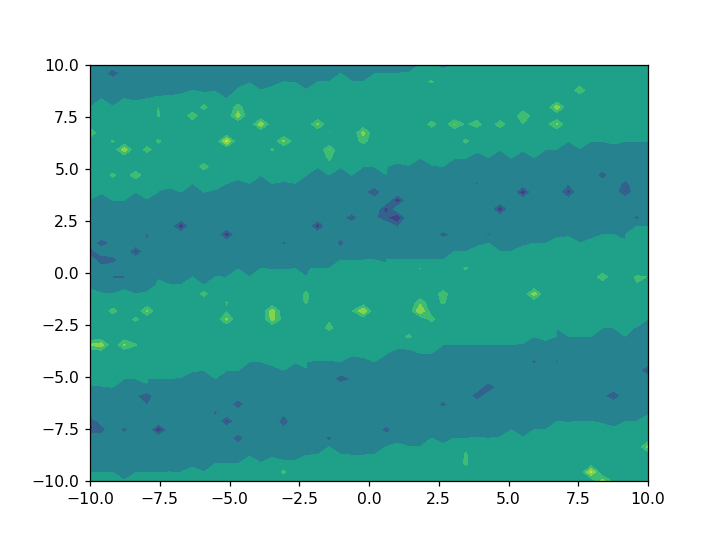

In [5]:
k,l = 0.1,-0.7
F_val = F(k,l) #spectral density at (0.5,0.5)

x,y = np.meshgrid(np.linspace(-10,10,N),np.linspace(-10,10,N))
f = np.empty((len(t_vals),N,N))
for i,t in enumerate(t_vals):
    f[i] = np.real(F_val * np.exp(1j*(k*x+l*y))*np.exp(1j*omega(k,l)*t+phi))
fig, ax = plt.subplots()
    
def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])

ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('single_wave.mp4')
plt.show()

<IPython.core.display.Javascript object>


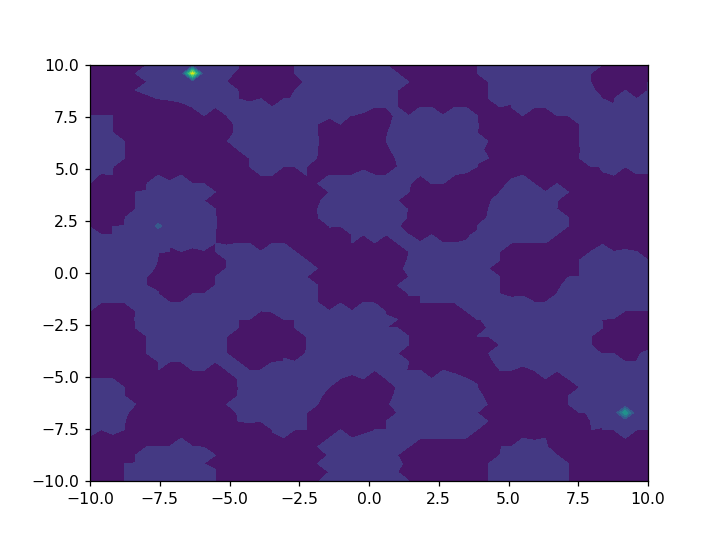

In [3]:
waves = [(-0.5,-0.5),(-1,1),(1,1),(0.1,0.5)]

x,y = np.meshgrid(np.linspace(-10,10,N),np.linspace(-10,10,N))
f = np.empty((len(t_vals),N,N))
for w in waves:
    k,l = w
    F_val = F(k,l)
    for i,t in enumerate(t_vals):
        f[i] += np.real(F_val * np.exp(1j*(k*x+l*y))*np.exp(1j*omega(k,l)*t+phi))

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])

ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('2waves.mp4')
plt.show()

<IPython.core.display.Javascript object>


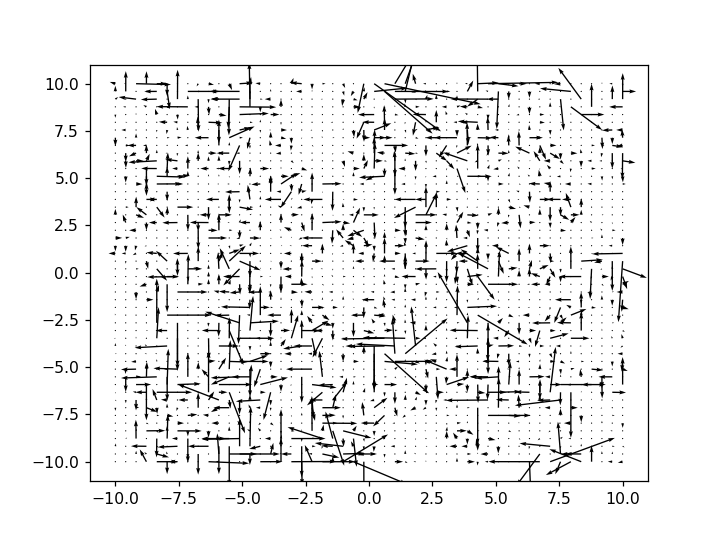

In [21]:
u = -np.gradient(f,axis=1)
v = np.gradient(f,axis=2)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.quiver(x,y,u[i],v[i])
    
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
ani.save('velocityfield.mp4')
plt.show()

In [ ]:
#Particle integrator for time slice
from scipy.integrate import solve_ivp

u,v = u[50],v[50]

def velocity_field(t, position):
    # Interpolate the velocity components based on the current position
    x, y = position
    X = np.linspace(-10,10,N)
    i,j = np.where(x,X),np.where(y,X)
    u_interp = u[i,j]
    v_interp = v[i,j]
    return [u_interp, v_interp]

def trajectory(initial_position, time_span, num_points):
    t_span = (time_span[0], time_span[1])  # Time span of integration
    t_eval = np.linspace(time_span[0], time_span[1], num_points)  # Points at which to store the solution

    # Solve the system of differential equations using scipy's solve_ivp function
    sol = solve_ivp(velocity_field, t_span, initial_position, t_eval=t_eval, vectorized=True)

    return sol.t, sol.y

# Example usage
initial_position = [0, 0]  # Initial position [x0, y0]
time_span = [0, 1]  # Time span of integration [t0, t_end]
num_points = 100  # Number of points to store in the trajectory

t, y = trajectory(initial_position, time_span, num_points)
